In [11]:
# This script runs on Python 3.12.10
# with requirements.txt
import xarray as xr
import matplotlib.pyplot as plt 
from matplotlib import cm
import matplotlib.colors as colors
import sys
import cmocean
import os
import numpy as np

In [12]:
## Here we visualize the SSH 
# file without tide
fn = os.getcwd() + '\\TideOFF' + '\\AMM12_1h_20120102_20120109_shelftb_grid_T.nc' # This is run in windows, linux may need a different \
ds_wo_tide = xr.open_dataset(fn)
## file with tide
fn = os.getcwd() + '\\TideON' + '\\AMM12_1h_20120102_20120109_shelftb_grid_T.nc' # This is run in windows, linux may need a different \
ds_w_tide = xr.open_dataset(fn)


In [13]:
import pandas as pd

## get time axis for plotting
ssh_time = ds_w_tide['time_instant'].values
ssh_time = pd.to_datetime(ssh_time)

nav_lat = ds_wo_tide['nav_lat'][:,0].values
nav_lon= ds_wo_tide['nav_lon'][0,:].values

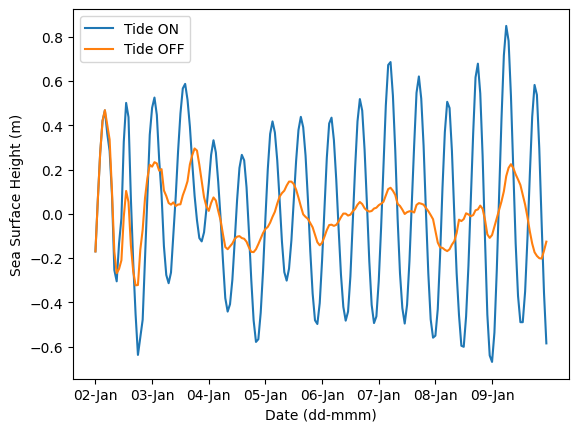

In [14]:
## plot ssh
spec_lat = 52.75
lat_idx = np.argmin(abs(nav_lat - spec_lat))

#print(nav_lat[lat_idx])

spec_lon = 360 -5.35
lon_idx = np.argmin(abs(nav_lon[0:159] - spec_lon))
#print(nav_lon[lon_idx])

## Get ssh 
ssh_wo_tide = ds_wo_tide['ssh'].values
ssh_w_tide = ds_w_tide['ssh'].values

plot_ssh_tide = ssh_w_tide[:,lat_idx,lon_idx]
plot_ssh_wo_tide = ssh_wo_tide[:,lat_idx,lon_idx]

plt.plot(plot_ssh_tide,label='Tide ON')
plt.plot(plot_ssh_wo_tide,label = 'Tide OFF')
plt.legend()
plt.ylabel('Sea Surface Height (m)')
plt.xlabel('Date (dd-mmm)')
ax = plt.gca()
time_idx = np.arange(0,192,24)
ax.set_xticks(time_idx,ssh_time[time_idx].strftime("%d-%b"))

In [15]:
## Here we visualize the SSH 
# file without tide
fn = os.getcwd() + '\\TideOFF' + '\\AMM12_5d_20120102_20120109_grid_T.nc' # This is run in windows, linux may need a different \
ds_wo_tide = xr.open_dataset(fn)
## file with tide
fn = os.getcwd() + '\\TideON' + '\\AMM12_5d_20120102_20120109_grid_T.nc' # This is run in windows, linux may need a different \
ds_w_tide = xr.open_dataset(fn)

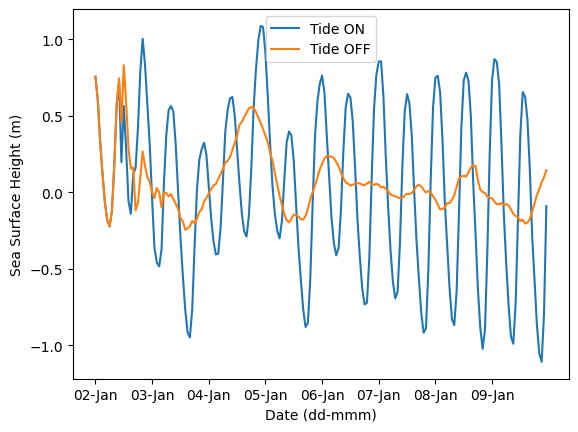

In [16]:
## plot ssh
spec_lat = 52.75
lat_idx = np.argmin(abs(nav_lat - spec_lat))

#print(nav_lat[lat_idx])

spec_lon = 2.86
lon_idx = np.argmin(abs(nav_lon[0:159] - spec_lon))
#print(nav_lon[lon_idx])

plot_ssh_tide = ssh_w_tide[:,lat_idx,lon_idx]
plot_ssh_wo_tide = ssh_wo_tide[:,lat_idx,lon_idx]

fig = plt.figure()
plt.plot(plot_ssh_tide,label='Tide ON')
plt.plot(plot_ssh_wo_tide, label = 'Tide OFF')
plt.legend()
plt.ylabel('Sea Surface Height (m)')
plt.xlabel('Date (dd-mmm)')
ax = plt.gca()
ax.set_xticks(time_idx,ssh_time[time_idx].strftime("%d-%b"))

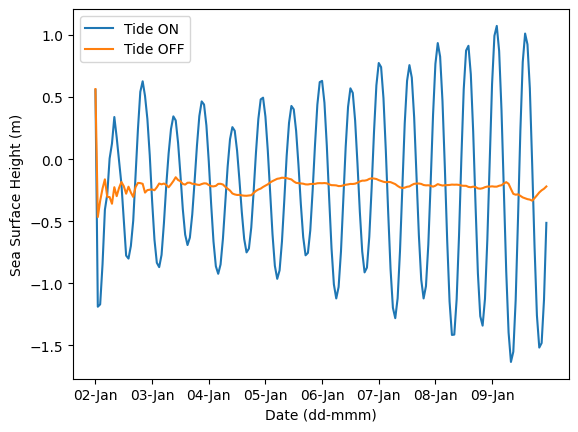

In [17]:
## plot ssh
spec_lat = 61.5
lat_idx = np.argmin(abs(nav_lat - spec_lat))

#print(nav_lat[lat_idx])

spec_lon = 2.7
lon_idx = np.argmin(abs(nav_lon[0:159] - spec_lon))
#print(nav_lon[lon_idx])

plot_ssh_tide = ssh_w_tide[:,lat_idx,lon_idx]
plot_ssh_wo_tide = ssh_wo_tide[:,lat_idx,lon_idx]

fig = plt.figure()
plt.plot(plot_ssh_tide,label='Tide ON')
plt.plot(plot_ssh_wo_tide, label = 'Tide OFF')
plt.legend()
plt.ylabel('Sea Surface Height (m)')
plt.xlabel('Date (dd-mmm)')
ax = plt.gca()
ax.set_xticks(time_idx,ssh_time[time_idx].strftime("%d-%b"))

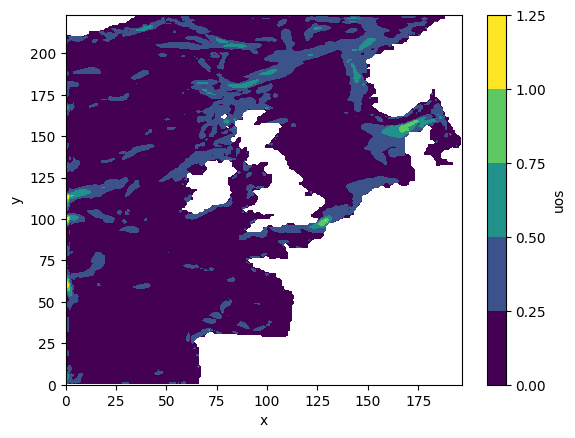

In [18]:
## Take a look at surface current speed.
u_wo_tide_fn =  os.getcwd() + '\\TideOFF' + '\\AMM12_1d_20120102_20120109_grid_U.nc'
v_wo_tide_fn =  os.getcwd() + '\\TideOFF' + '\\AMM12_1d_20120102_20120109_grid_V.nc'
u_wo_tide = xr.open_dataset(u_wo_tide_fn)
v_wo_tide = xr.open_dataset(v_wo_tide_fn)

u_wo_tide = u_wo_tide['uos'].max(dim='time_counter')
v_wo_tide = v_wo_tide['vos'].max(dim='time_counter')

uv_wo_tide = np.hypot(u_wo_tide,v_wo_tide)
uv_wo_tide.plot.contourf()

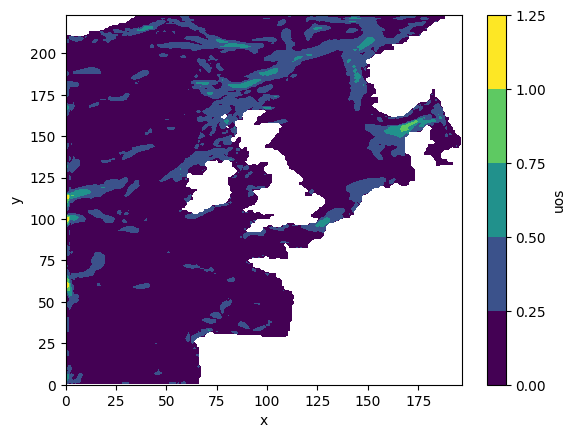

In [19]:
## Take a look at surface current speed.
u_tide_fn =  os.getcwd() + '\\TideON' + '\\AMM12_1d_20120102_20120109_grid_U.nc'
v_tide_fn =  os.getcwd() + '\\TideON' + '\\AMM12_1d_20120102_20120109_grid_V.nc'
u_tide = xr.open_dataset(u_tide_fn)
v_tide = xr.open_dataset(v_tide_fn)

u_tide = u_tide['uos'].max(dim='time_counter')
v_tide = v_tide['vos'].max(dim='time_counter')

uv_tide = np.hypot(u_tide,v_tide)
uv_tide.plot.contourf()

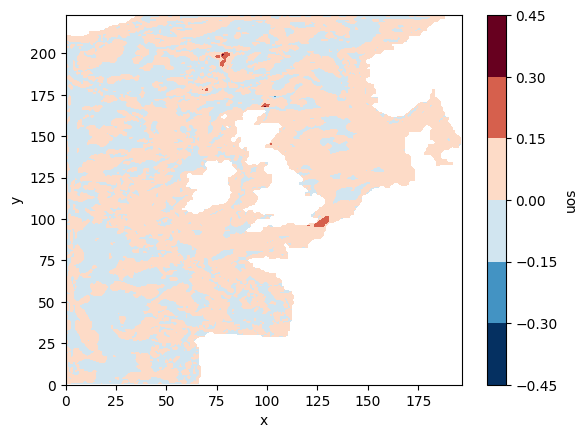

In [20]:
## Difference in surface current when tide is off and on
diff_tide = uv_wo_tide - uv_tide
nav_lat = ds_wo_tide['nav_lat']
nav_lon= ds_wo_tide['nav_lon']
diff_tide.plot.contourf()